<a href="https://colab.research.google.com/github/beatricebianchi3/FINTECH-ML---Driven-early-warning-system/blob/main/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **k-Nearest Neighbours**
kNN algorithm is one of the most basic yet essential **supervised learning** classifier in machine learning. It finds intense application in *pattern recognition, data mining, and intrusion detection*, and it is widely disposable in real-life scenarios since it is **non-parametric**, meaning it does not make any underlying assumptions about the distribution of data.

The main idea is to use **proximity** (measured via a chosen distance metric such as *Euclidean distance*) to make classifications or predictions about the grouping of an individual data point, based on the assumption that similar points can be found near one another. Essentially, in a classification proble, a class label is assigned through **plurality voting** - i.e. the label that is most frequently represented around a given data point is used -.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# Dataset importation
df= pd.read_excel('FinancialMarketData.xlsx', sheet_name=2)

# Actual labels (1 = Market crashes)
y = df.iloc[:, 0]

# Drop the label and the dates
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)

# Print dataset
df.head()

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,283.25,0.077,1388,157.26,100.56,105.86,1.6460,25.77,22.50,6.671,...,116.4635,230.5267,123.7616,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,287.65,0.043,1405,165.01,101.86,105.47,1.6383,28.85,21.50,6.747,...,117.2674,231.3770,123.7616,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,287.15,0.135,1368,167.24,102.41,106.04,1.6496,28.28,23.02,6.634,...,117.9946,232.3895,123.7616,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,282.75,0.191,1311,166.85,104.92,107.85,1.6106,28.22,23.45,6.423,...,120.5100,231.9417,122.3281,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,298.40,0.312,1277,165.43,104.22,109.30,1.6108,28.02,21.25,6.231,...,118.7914,237.8117,122.3281,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [ ]:
# Dataset cleaning: check NaN values and remove them

nan_column = df.isna().sum()
print("Number of NaN in each column:")
print(nan_column)

df = df.dropna()
print("\nDataFrame senza righe contenenti NaN:")
print(df)

Number of NaN in each column:
XAU BGNL     0
ECSURPUS     0
BDIY         0
CRY          0
DXY          0
JPY          0
GBP          0
Cl1          0
VIX          0
USGG30YR     0
GT10         0
USGG2YR      0
USGG3M       0
US0001M      0
GTDEM30Y     0
GTDEM10Y     0
GTDEM2Y      0
EONIA        0
GTITL30YR    0
GTITL10YR    0
GTITL2YR     0
GTJPY30YR    0
GTJPY10YR    0
GTJPY2YR     0
GTGBP30Y     0
GTGBP20Y     0
GTGBP2Y      0
LUMSTRUU     0
LMBITR       0
LUACTRUU     0
LF98TRUU     0
LG30TRUU     0
LP01TREU     0
EMUSTRUU     0
LF94TRUU     0
MXUS         0
MXEU         0
MXJP         0
MXBR         0
MXRU         0
MXIN         0
MXCN         0
dtype: int64

DataFrame senza righe contenenti NaN:
      XAU BGNL  ECSURPUS  BDIY       CRY      DXY     JPY     GBP    Cl1  \
0       283.25     0.077  1388  157.2600  100.560  105.86  1.6460  25.77   
1       287.65     0.043  1405  165.0100  101.860  105.47  1.6383  28.85   
2       287.15     0.135  1368  167.2400  102.410  106.04  1

In [ ]:
# Standardization
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)
column_names = df.columns
column_names = column_names.tolist()

# Create the dataframe for the standardized values
df_standardized_pd = pd.DataFrame(df_standardized, columns=column_names)
df_standardized_pd

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,-1.424377,0.116941,-0.432277,-1.289246,0.846232,-0.058102,0.359879,-1.349527,0.290316,2.345104,...,-1.052593,-1.529484,-1.782485,-0.273397,0.956041,1.028789,-1.061289,-1.419419,-1.173857,-0.793990
1,-1.415478,0.019602,-0.423848,-1.175689,0.960528,-0.088487,0.323600,-1.230558,0.174552,2.409617,...,-1.045276,-1.526739,-1.782485,-0.255250,1.040230,1.045740,-0.991858,-1.385836,-1.149828,-0.857078
2,-1.416489,0.282989,-0.442193,-1.143014,1.008884,-0.044078,0.376841,-1.252575,0.350514,2.313697,...,-1.038657,-1.523471,-1.782485,-0.316639,0.894944,0.949983,-1.030691,-1.444539,-1.135224,-0.868402
3,-1.425389,0.443312,-0.470454,-1.148728,1.229563,0.096943,0.193090,-1.254892,0.400292,2.134589,...,-1.015762,-1.524916,-1.801371,-0.317527,1.025317,1.111444,-1.075649,-1.494479,-1.124171,-0.915718
4,-1.393734,0.789723,-0.487312,-1.169535,1.168019,0.209916,0.194033,-1.262618,0.145611,1.971609,...,-1.031405,-1.505970,-1.801371,-0.279370,1.288948,1.248754,-0.971646,-1.440592,-1.073498,-0.914505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,1.497764,0.867021,0.005523,-0.890078,0.123178,0.164727,-0.912241,-0.113874,0.035636,-1.342820,...,1.781110,1.759206,1.723279,3.142187,1.560758,2.073760,-0.234767,0.108805,2.473954,2.300980
1107,1.412004,0.763956,-0.077773,-0.884629,0.207669,0.287049,-0.931558,-0.006107,-0.044241,-1.306913,...,1.788943,1.736163,1.670111,3.192590,1.678141,2.107362,-0.271440,0.149513,2.461125,2.218884
1108,1.528751,1.156174,-0.083227,-0.870486,0.123090,0.255105,-0.883029,-0.053231,-0.216730,-1.345706,...,1.807212,1.761959,1.734240,3.363323,1.744049,2.049008,-0.216624,0.082013,2.457967,2.345061
1109,1.527558,1.233472,-0.059428,-0.836822,0.080624,0.201346,-0.923077,-0.020399,-0.386903,-1.370407,...,1.804880,1.769406,1.730325,3.466292,1.748859,2.061209,-0.225549,0.105527,2.415978,2.202708


In [ ]:
# Data splitting: 60-20-20
X_train_temp, X_test, y_train_temp, y_test = train_test_split(df_standardized_pd, y, test_size=0.2, random_state=41)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=41)

print("Number of instances in dataset:", df_standardized_pd.shape[0])
print("Number of instances in training set:", X_train.shape[0])
print("Number of instances in validation set:", X_val.shape[0])
print("Number of instances in test set:", X_test.shape[0])

Number of instances in dataset: 1111
Number of instances in training set: 666
Number of instances in validation set: 222
Number of instances in test set: 223


# **Performance on the entire dataset**

In [ ]:
kNN = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 4, 5, 6, 7, 8]}

grid_search = GridSearchCV(kNN, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:")
print(grid_search.best_params_)

# Training
model = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
model.fit(X_train, y_train)

# Validation
Y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, Y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("Classification Report (Validation Set):")
print(classification_report(y_val, Y_val_pred))

# Testing
Y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, Y_test_pred)
print("Validation Accuracy:", test_accuracy)
print("Classification Report (Validation Set):")
print(classification_report(y_test, Y_test_pred))

# **Buckets**

We divide our dataset in the 4 buckets of *bond, equities, commodities* and *indexes*, so that, for each of them, we apply different methods and then choose the best one in terms of **recall** (especially for the positive outcomes 1) and overall performance.

In [ ]:
# Training buckets
bond_train = X_train.iloc[:, 9:35]
equity_train = X_train.iloc[:, 35:42]
commodities_train = X_train.iloc[:, [0,3,7]]
indexes_train = X_train.iloc[:, [1,2,4,5,6,8]]

# Print the columns' name in each bucket as a check
print("Bonds: ", bond_train.columns.tolist())
print("Equity: ", equity_train.columns.tolist())
print("Commodities: ", commodities_train.columns.tolist())
print("Indexes: ", indexes_train.columns.tolist())

Bonds:  ['USGG30YR', 'GT10', 'USGG2YR', 'USGG3M', 'US0001M', 'GTDEM30Y', 'GTDEM10Y', 'GTDEM2Y', 'EONIA', 'GTITL30YR', 'GTITL10YR', 'GTITL2YR', 'GTJPY30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTGBP30Y', 'GTGBP20Y', 'GTGBP2Y', 'LUMSTRUU', 'LMBITR', 'LUACTRUU', 'LF98TRUU', 'LG30TRUU', 'LP01TREU', 'EMUSTRUU', 'LF94TRUU']
Equity:  ['MXUS', 'MXEU', 'MXJP', 'MXBR', 'MXRU', 'MXIN', 'MXCN']
Commodities:  ['XAU BGNL', 'CRY', 'Cl1']
Indexes:  ['ECSURPUS', 'BDIY', 'DXY', 'JPY', 'GBP', 'VIX']


In [ ]:
# Validation buckets

bond_val = X_val.iloc[:, 9:35]
equity_val = X_val.iloc[:, 35:42]
commodities_val = X_val.iloc[:, [0,3,7]]
indexes_val = X_val.iloc[:, [1,2,4,5,6,8]]

In [ ]:
# Testing buckets

bond_test = X_test.iloc[:, 9:35]
equity_test = X_test.iloc[:, 35:42]
commodities_test = X_test.iloc[:, [0,3,7]]
indexes_test = X_test.iloc[:, [1,2,4,5,6,8]]

# **Hyperparameter tuning**

The kNN algorithm's performance strongly relies on the chosen number of neighbors k. Therefore, in order to get the best prediction results, we search for the optimal value of the factor k by implementing the **GridSearch** cross-validation algorithm.

In [ ]:
def kNN_run(X_train, Y_train, X_val, Y_val):

  # GridSearch cross-validatoìion
  kNN = KNeighborsClassifier()
  param_grid = {'n_neighbors': [3, 4, 5, 6, 7, 8]}

  grid_search = GridSearchCV(kNN, param_grid, cv=5)
  grid_search.fit(X_train, Y_train)

  print("Best hyperparameters:")
  print(grid_search.best_params_)

  # Training
  model = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
  model.fit(X_train, Y_train)

  # Model evaluation on validation set
  Y_val_pred = model.predict(X_val)
  val_accuracy = accuracy_score(Y_val, Y_val_pred)
  print("Validation Accuracy:", val_accuracy)
  print("Classification Report (Validation Set):")
  print(classification_report(Y_val, Y_val_pred))

  # Get the predicted probabilities for the positive class (Y=1)
  Y_val_probs = model.predict_proba(X_val)[:, 1]

  # Compute ROC curve and AUC for validation set
  fpr_val, tpr_val, _ = roc_curve(Y_val, Y_val_probs)
  roc_auc_val = auc(fpr_val, tpr_val)

  # Plot ROC curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='ROC curve (Val) (AUC = %0.2f)' % roc_auc_val)
  plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()

  return Y_val_pred

Best hyperparameters:
{'n_neighbors': 5}
Validation Accuracy: 0.9009009009009009
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       175
           1       0.84      0.66      0.74        47

    accuracy                           0.90       222
   macro avg       0.88      0.81      0.84       222
weighted avg       0.90      0.90      0.90       222



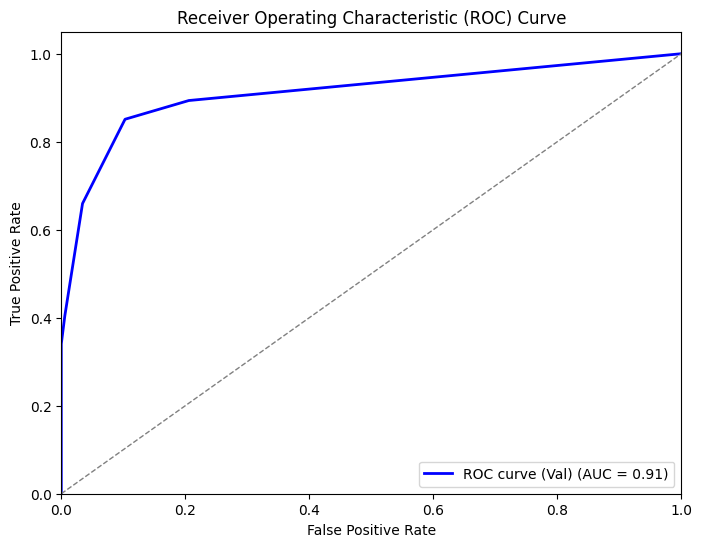

[0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# BONDS: Training & Validation

bond_val_pred = kNN_run(bond_train, y_train, bond_val, y_val)
print(bond_val_pred)

Best hyperparameters:
{'n_neighbors': 3}
Validation Accuracy: 0.8783783783783784
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       175
           1       0.76      0.62      0.68        47

    accuracy                           0.88       222
   macro avg       0.83      0.78      0.80       222
weighted avg       0.87      0.88      0.87       222



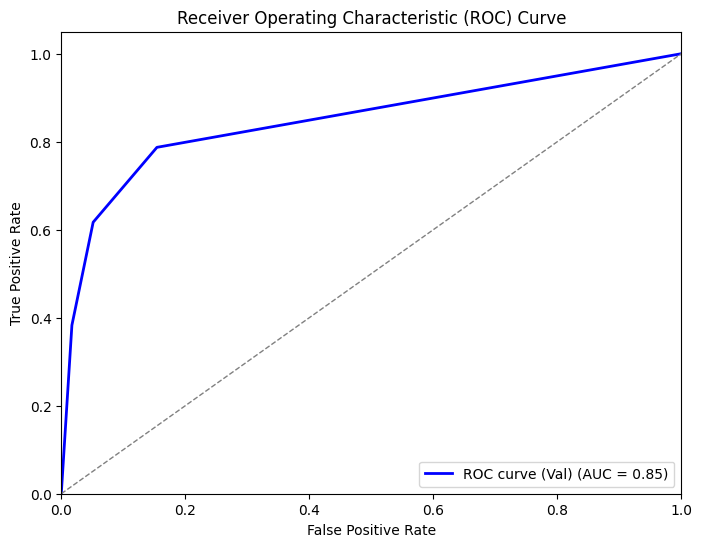

In [ ]:
# EQUITIES: Training & Validation

equity_val_pred = kNN_run(equity_train, y_train, equity_val, y_val)

Best hyperparameters:
{'n_neighbors': 3}
Validation Accuracy: 0.8918918918918919
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       175
           1       0.81      0.64      0.71        47

    accuracy                           0.89       222
   macro avg       0.86      0.80      0.82       222
weighted avg       0.89      0.89      0.89       222



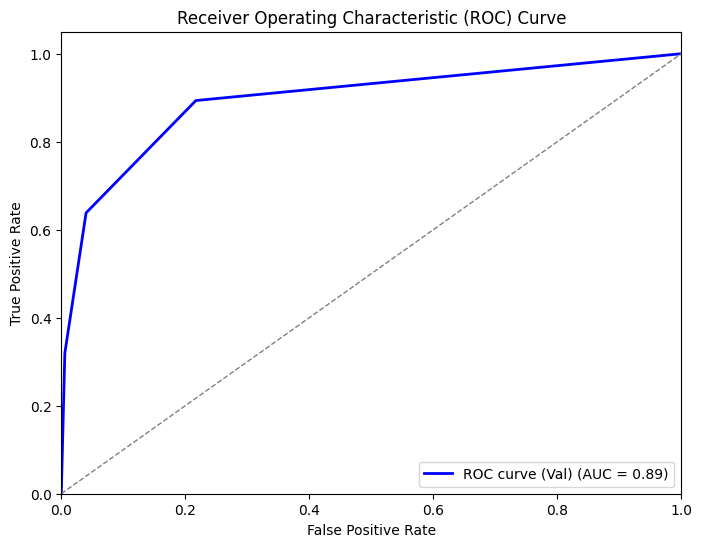

In [ ]:
# COMMODITIES: Training & Validation

comm_val_pred = kNN_run(commodities_train, y_train, commodities_val, y_val)

Best hyperparameters:
{'n_neighbors': 8}
Validation Accuracy: 0.8738738738738738
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       175
           1       0.83      0.51      0.63        47

    accuracy                           0.87       222
   macro avg       0.85      0.74      0.78       222
weighted avg       0.87      0.87      0.86       222



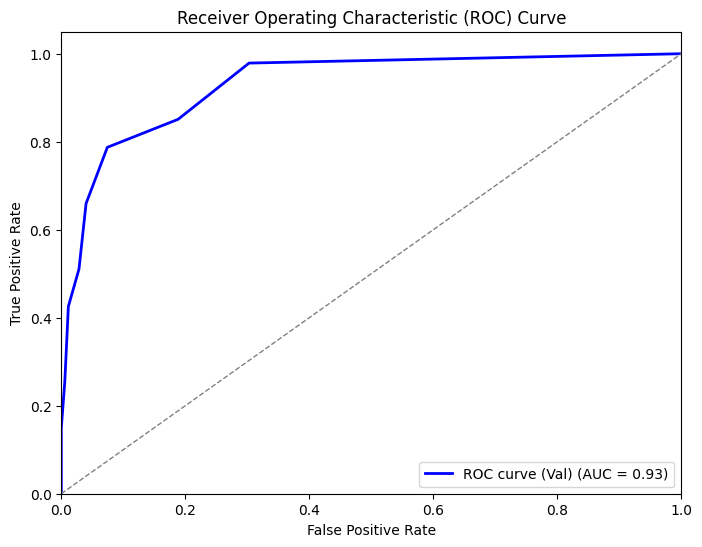

In [ ]:
# INDEXES: Training & Validation

indexes_val_pred = kNN_run(indexes_train, y_train, indexes_val, y_val)

# **Oversampling**

Since having imbalanced dataset (80%-20%) may rise some concerns in our modeling (e.g. it may lead to biased models), we try to handle it by oversampling the minority class (market crashes).

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

Best hyperparameters:
{'n_neighbors': 4}
Validation Accuracy: 0.8873873873873874
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       175
           1       0.70      0.81      0.75        47

    accuracy                           0.89       222
   macro avg       0.83      0.86      0.84       222
weighted avg       0.90      0.89      0.89       222



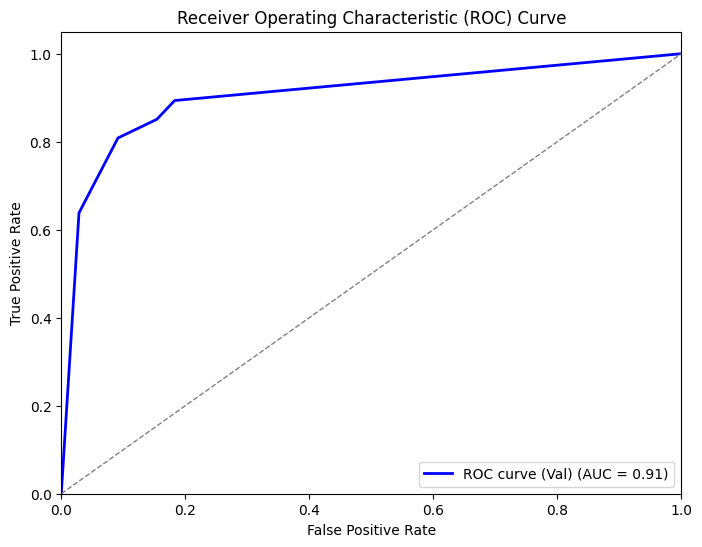

In [ ]:
# Oversampled bond
bond_resampled, y_resampled = oversampler.fit_resample(bond_train, y_train)
bond_val_over_pred = kNN_run(bond_resampled, y_resampled, bond_val, y_val)

Best hyperparameters:
{'n_neighbors': 3}
Validation Accuracy: 0.8648648648648649
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       175
           1       0.67      0.70      0.69        47

    accuracy                           0.86       222
   macro avg       0.80      0.81      0.80       222
weighted avg       0.87      0.86      0.87       222



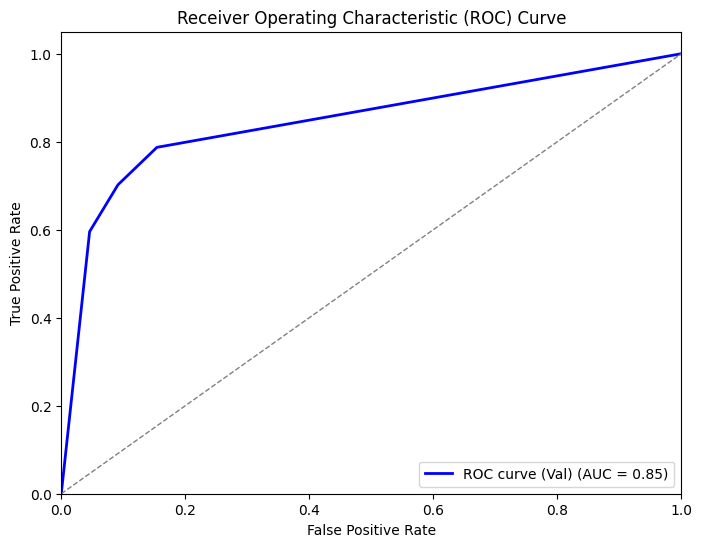

In [ ]:
# Oversampled equity
equity_resampled, y_resampled = oversampler.fit_resample(equity_train, y_train)
equity_val_over_pred = kNN_run(equity_resampled, y_resampled, equity_val, y_val)

Best hyperparameters:
{'n_neighbors': 3}
Validation Accuracy: 0.8513513513513513
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       175
           1       0.62      0.77      0.69        47

    accuracy                           0.85       222
   macro avg       0.78      0.82      0.79       222
weighted avg       0.87      0.85      0.86       222



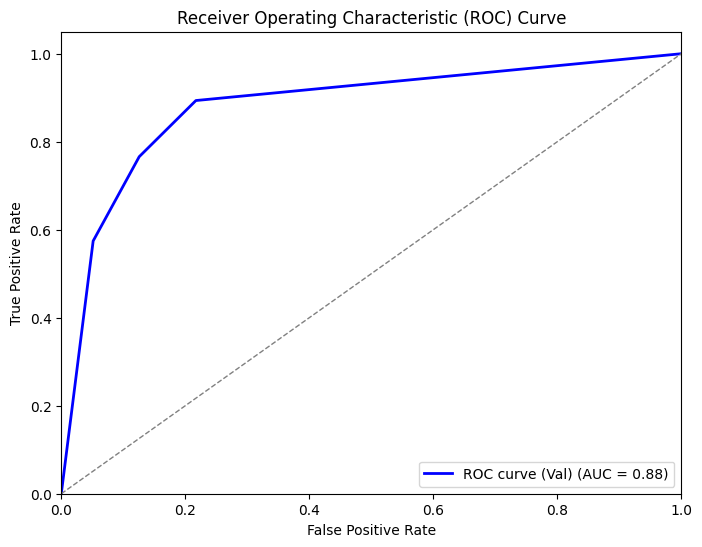

In [ ]:
# Oversampled commodities
commodities_resampled, y_resampled = oversampler.fit_resample(commodities_train, y_train)
commodities_val_over_pred = kNN_run(commodities_resampled, y_resampled, commodities_val, y_val)

Best hyperparameters:
{'n_neighbors': 3}
Validation Accuracy: 0.9144144144144144
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       175
           1       0.78      0.83      0.80        47

    accuracy                           0.91       222
   macro avg       0.87      0.88      0.87       222
weighted avg       0.92      0.91      0.92       222



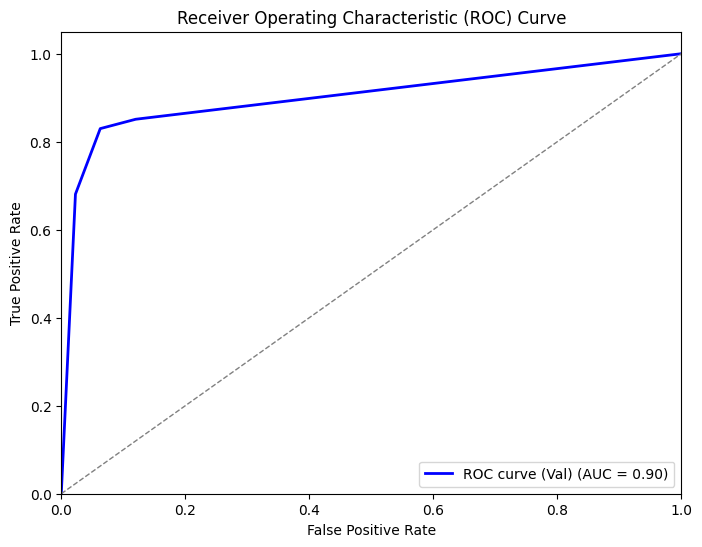

In [ ]:
# Oversampled indexes
indexes_resampled, y_resampled = oversampler.fit_resample(indexes_train, y_train)
indexes_val_over_pred = kNN_run(indexes_resampled, y_resampled, indexes_val, y_val)

As we can see from the results, after oversampling we have a significant **increase in the recall** of the positive outcomes, together with an evident **decrease in the precision**.

This is because, having more examples of the minority class, the model learn to recognize it better, reducing the number of false negatives. However, at the same time, the model might become more prone to predicting the minority class, even when the prediction is incorrect, because it has seen more instances of the minority class during training, leading to more false positives.